In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
import pandas as pd
import time

#Intro to MLPs

Next up in Cal's educational mission of assuring our student body that they aren't just numbers, we will examine a dataset of high school students and model their entire livelihoods using Multi-Layer Perceptrons (MLPs)! In this assignment, we will understand the basic function of and intuition behind the MLP, including the form of inputs/outputs, the feedforward mechanism, its ability to perform classification, and the prebuilt industry-standard package `sklearn`. The dataset stored in `students` is from two high schools in Portugal with information on student grades in Math in addition to demographic, social and school related features. You can find the dataset [here](https://archive.ics.uci.edu/ml/datasets/Student+Performance).


##Question 1 - Data Preprocessing
Let us first examine the features available to us and their types. 

In [ ]:

students = pd.read_csv("sample_data/student-mat.csv", sep=";")
students = students[students["G3"] != 0]

students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### Q1.1 One-hot Encoding
As you can see the dataset contains a number of different columns, some being numeric and others being qualitative. However, because neural networks only take quantitative inputs, we will need all of the columns to be numeric. You will do this through a method called 'one hot encoding,' which involves taking qualitative columns with n different possible options and splitting them into n different columns. If the original column has a certain value, the value for that column will be "1" and the value in the other n-1 columns will be "0". **Modify the dataset so each of the qualitative columns are one-hot encoded by filling in the function `oneHotEncode`.** The one-hot encoded columns should be named following the convention "originalColumnName_feature" (eg. the `school` column should be split into `school_GP` and `school_MS` columns). Don't forget to drop the original column!

In [1]:
def oneHotEncode(df, colName):
  """Takes in a dataframe df and a column name colName for which there is categorical data. 
  Returns the new one-hot-encoded columns.
  """
  
  #TODO
  unique = ...
  for newCol in unique:
    ...
...
  #END TODO

  return df

IndentationError: ignored

Run the following block to one-hot-encode all the columns with categorical data.

In [ ]:
needToEncode = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", 
                "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
                
for col in needToEncode:
  students = oneHotEncode(students, col)

students.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_U,address_R,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_teacher,Fjob_other,Fjob_services,Fjob_health,Fjob_at_home,reason_course,reason_other,reason_home,reason_reputation,guardian_mother,guardian_father,guardian_other,schoolsup_yes,schoolsup_no,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_yes,nursery_no,higher_yes,higher_no,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Q1.2 Train Test Split
Next, the data must be split into "training data" and "test data." The training data is what we use to train our model, and the test data is what we will use to evaluate our model. Do so with train_test_split (which we have imported for you above), splitting the data into 80% training and 20% test data sets. 

In [ ]:
#TODO
train, test = ...
#END TODO

###Q1.3 Inputs and Outputs

Next,  the data must be split into *X* and *Y* values, both for the training and test data sets. In this case the Y values are the columns `G1`, `G2`, and `G3`, and the X values are all other columns. The Y values that we are trying to learn are the grades of each student at the first, second, and third grading periods (think midterms). Each of these Y-values should get its own numpy array, as all of them will be prediction targets. Note that the pandas dataframes must be converted into numpy arrays so they can be manipulated with linear algebra. 




In [ ]:
#TODO
X_train = ...
X_test = ...
y_train_G1 = ...
y_train_G2 = ...
y_train_G3 = ...

y_test_G1 = ...
y_test_G2 = ...
y_test_G3 = ...

#END TODO

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train_G1 = y_train_G1.to_numpy()
y_train_G2 = y_train_G2.to_numpy()
y_train_G3 = y_train_G3.to_numpy()
y_test_G1 = y_test_G1.to_numpy()
y_test_G2 = y_test_G2.to_numpy()
y_test_G3 = y_test_G3.to_numpy()

Run this cell as a sanity check, it ensures that the numpy arrays you have created are of the right shape and only contain numerical values.

In [ ]:
assert(X_train.shape == (285, 56))
assert(not np.isnan(X_train).any())
assert(X_test.shape == (72, 56) )
assert(not np.isnan(X_test).any())
assert(y_train_G1.shape == (285, 1))
assert(not np.isnan(y_train_G1).any())
assert(y_test_G1.shape == (72, 1))
assert(not np.isnan(y_test_G1).any())
print("Success!")

Success!


## Question 2 - Building the MLP

###Q2.1 Activation Function - Rectified Linear Unit
Now you are going to implement your first neural network. **Let us first write the activation function - we will use the the ReLU function, a simple but widely used variant.** This should be one line.

In [ ]:
def relu(x):
  #TODO
  return ...
  #END TODO

### Q2.2 A Single Naive Neuron
A neural network is a collection of neurons, but **you are going to start by implementing a single neuron**. Initialize the neuron with random weights and a random bias using `np.random.rand`. The inputs should be first weighted and summed - **use a for loop to calculate this weighted sum**. At the end, you need to apply the activation function you wrote above. Remember that the equation for the output of the neuron is $\phi(b + \sum x_i * w_i$ where $x_i)$ are the inputs, $w_i$ are the outputs, $b$ is the bias, and $\phi$ is the activation function.

In [ ]:
class NaiveNeuron:
  def __init__(self, input_size):
    #TODO
    self.weights = ...
    self.bias = ...
    #END TODO

  def run(self, input):
    weighted_sum = 0
    #TODO
    for i, w in zip(input, self.weights):
      ...
    ...
    #END TODO
    return activated
    


### Q2.3 A Single Vectorized Neuron
Here we will see the power of neural networks in their ability to be computed in parallel. **Vectorize the neuron by using numpy's built in vector multiplication.** The initialization should be the same as before. We can now write our equation as $\phi(b + \textbf{w}^T\textbf{x}$).

In [ ]:
class VectorizedNeuron:
  def __init__(self, input_size):
    #TODO
    self.weights = ...
    self.bias = ...
    #END TODO

  def run(self, input):
    #TODO
    activated = ...
    return activated
    #END TODO


###Q2.4 The Power of Vectorization 
Let us examine why it is so important that the computations can be vectorized. **Run the cell below and comment on your observations.** Which neuron is more effective, and why would we prefer it? This can act as a sanity check of your previous implementations of each neuron.

In [ ]:
naive_neuron = NaiveNeuron(500)
vectorized_neuron = VectorizedNeuron(500)

naive_start = time.time()
for _ in range(10000):
  naive_weighted_sum = naive_neuron.run(np.ones(500))
naive_end = time.time()

vectorized_start = time.time()
for _ in range(10000):
  vectorized_weighted_sum = vectorized_neuron.run(np.ones(500))
vectorized_end = time.time()

print("Naive neuron took: " + str(naive_end - naive_start))
print("Vectorized neuron took: " + str(vectorized_end - vectorized_start))

Naive neuron took: 2.142167329788208
Vectorized neuron took: 0.06779789924621582


Answer: (TODO) We can see that even though we ran each neuron the same amount of times with the same sized input, the vectorized neuron is much faster. This is because the computations are optimized and done in parallel rather than sequentially. This allows us to process data much faster, which will be important when we link together more layers and build deeper networks.

### Q2.5 Building a Single Layer
Now that you have a function that acts as a single neuron, try linking that neuron together with more neurons! Fill in the function `run` that outputs the array of results from all the `Neuron`s in the layer, which you must instantiate.


In [ ]:
class Layer:
  def __init__(self, input_size, layer_size):
    #TODO
    self.neurons = ...
    #END TODO

  def run(self, input):
    #TODO
    ...
    return ...
    #END TODO

### Q2.6 Linking Layers Together
**Now that you have a network with one layer, try linking together multiple layers into a larger network.** Again, this network will not be able to accurately estimate the y values of its inputs as we are not training the network. We are only implementing the feedforward mechanism.

In [ ]:
class FeedForwardNetwork:
  def __init__(self, layers):
    self.layers = ...

  def feedforward(self, input):
    #TODO
    output = ...
    return ...
    #END TODO

###Q2.7 Putting It All Together
We now have finished implementing the forward pass of an MLP! The underlying structure is all there, and you should now understand the building blocks that can now be used to build fancier models. **Run a forward pass on the first row of `X_train` (which corresponds to a student) using a 3-layered feedforward network with hidden layer size 100 and examine its output.** (Hint: Think about what the input and output sizes are of each layer).

In [ ]:
#TODO
layer1 = ...
layer2 = ...
layer3 = ...

feedforward_network = ...

one_student = ...
prediction = ...
#END TODO

print(prediction)

[81394.26232389]


###Q2.8 Looking Forwards - Training and Backpropagation
**Explain why our prediction above is the way it is. Do they look close to any of the `G1`, `G2`, `G3` columns that we are trying to predict? Why or why not? What is necessary for us to have an accurate prediction?**



TODO

END TODO

## Q3 - Package: Scikit-Learn





The first network from a package you are going to implement is a basic network for classification. Implement the MLP classifier specified at 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

###Q3.1 Classifying G3

Currently, the y values of the dataset are numerical and in three columns. However, we want to be able to make binary classifications about the students, so convert y_train_G3 and y_test_G3 into 1x(N\*0.8) and 1x(N\*.2) numpy vectors. Create a classifier with two hidden layers of size 100 each that predicts if a student's G3 grade is above or below the average G3 grade (for the whole dataset). Report the percent classification accuracy on the training and test datasets. 



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#TODO

classifier = ...
mean_score = ...
y_train_G3_class = ...
y_test_G3_class = ...

#END TODO


print("test accuracy is", np.mean(classifier.predict(X_test) == y_test_G3_class))
print("train accuracy is", np.mean(classifier.predict(X_train) == y_train_G3_class))


test accuracy is 0.5405092592592593
train accuracy is 0.5071345029239767


###Q3.2 Classifying G1 and G2
Now do the same for G1 and G2, reporting the training and test accuracy for each. 




In [ ]:
#TODO

classifier = ...
mean_score = ...
y_train_G2_class = ...
y_test_G2_class = ...

classifier = ...
mean_score = ...
y_train_G1_class = ...
y_test_G1_class = ...

#END TODO


print("test accuracy for G2 is", np.mean(classifier.predict(X_test) == y_test_G2_class))
print("train accuracy for G2 is", np.mean(classifier.predict(X_train) == y_train_G2_class))

print("test accuracy for G1 is", np.mean(classifier.predict(X_test) == y_test_G1_class))
print("train accuracy for G1 is", np.mean(classifier.predict(X_train) == y_train_G1_class))

test accuracy for G2 is 0.5366512345679012
train accuracy for G2 is 0.5049430594028932
test accuracy for G1 is 0.5513117283950617
train accuracy for G1 is 0.5085380116959064


### Q3.3 Iterations vs Accuracy
Now, we're going to investigate the effect of the number of iterations on the training and test accuracy. In increments of two, plot the train and test accuracy vs the number of iterations, between one and five hundred iterations. Label the axes and provide a key.

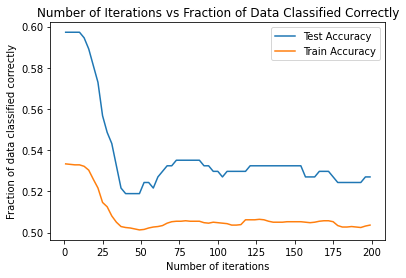

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def report_training_and_test_accuracy(max_iter):
  classifier = MLPClassifier(random_state=1,learning_rate_init=0.0001, max_iter=max_iter, activation='relu', hidden_layer_sizes=(100,))
  mean_score = (y_train_G3.sum() + y_test_G3.sum()) / (y_train_G3.shape[0] + y_test_G3.shape[0])
  y_train_class = (y_train_G3 > mean_score).astype(int)
  y_test_class = (y_test_G3 > mean_score).astype(int)
  classifier.fit(X_train, y_train_class)
  return np.mean(classifier.predict(X_test) == y_test_class), np.mean(classifier.predict(X_train) == y_train_class)

xs = np.arange(1, 200, 3)
accuracy = [report_training_and_test_accuracy(x) for x in xs]
ys_test = [index[0] for index in accuracy]
ys_train = [index[1] for index in accuracy]

import warnings
warnings.filterwarnings("ignore")

plt.plot(xs, ys_test, label="Test Accuracy")
plt.plot(xs, ys_train, label="Train Accuracy")
plt.xlabel("Number of iterations")
plt.ylabel("Fraction of data classified correctly")
plt.title("Number of Iterations vs Fraction of Data Classified Correctly")
plt.legend()

###Q3.4 Iteration Rationale
Why do you think the graph looks like that? Intuition might indicate that the longer you train the better the predictions will be, but the graph may say otherwise.

In [2]:
#TODO

#END TODO

### Q3.4 Regressing G3

Now you will implement a MLP that performs regression rather than classification. Create numpy arrays y_train_regress and y_test_regress, being 1x(N\*0.8) and 1x(N\*.2) numpy vectors of the student's G3 grade, then use the MLP regressor specified at

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

to train the network to predict student's scores. Report the error on the training and test datasets. 

test squared error is 12.500120798796559
train squared error is 14.784358595591502


Text(0, 0.5, "Students' MLP-predicted grades")

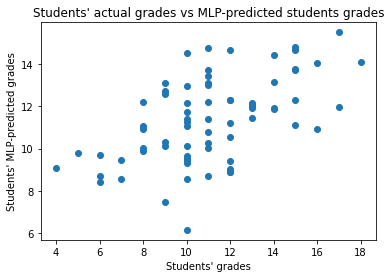

In [ ]:
from sklearn.neural_network import MLPRegressor


#TODO
y_train_regress = ...
y_test_regress = ...
regressor = ...
regressor = ...
#END TODO

print("test squared error is", ((regressor.predict(X_test) - y_test_regress)**2).mean())
print("train squared error is", ((regressor.predict(X_train) - y_train_regress)**2).mean())

plt.scatter(y_test_regress, regressor.predict(X_test))
plt.title("Students' actual grades vs MLP-predicted students grades")
plt.xlabel("Students' grades")
plt.ylabel("Students' MLP-predicted grades")